In [1]:
import gym 
import minihack

import numpy as np
import time
import matplotlib.pyplot as plt

from rules_new import RuleNew, initial_population, print_rule, make_rule_good, good_movement
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness, compute_best_fitness
from genetic_new import genetic_algorithm
from utility_func import *

## Create Room Task

In [2]:
env=gym.make(
        "MiniHack-Room-Random-15x15-v0",
        observation_keys=("chars", "colors", "specials", "pixel"),
    )
env.seed(42)
obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                .>.............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

In [3]:
agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])
goal_position = goal_position[0] - 3, goal_position[1] - 32
agent_position = agent_position[0] - 3, agent_position[1] - 32
print(agent_position)
print(goal_position)
distance_grid = find_distance_grid(*goal_position)
print(distance_grid)


(13, 3)
(2, 1)
[[ 2  2  2  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  1  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 1  1  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 2  2  2  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 3  3  3  3  3  4  5  6  7  8  9 10 11 12 13]
 [ 4  4  4  4  4  4  5  6  7  8  9 10 11 12 13]
 [ 5  5  5  5  5  5  5  6  7  8  9 10 11 12 13]
 [ 6  6  6  6  6  6  6  6  7  8  9 10 11 12 13]
 [ 7  7  7  7  7  7  7  7  7  8  9 10 11 12 13]
 [ 8  8  8  8  8  8  8  8  8  8  9 10 11 12 13]
 [ 9  9  9  9  9  9  9  9  9  9  9 10 11 12 13]
 [10 10 10 10 10 10 10 10 10 10 10 10 11 12 13]
 [11 11 11 11 11 11 11 11 11 11 11 11 11 12 13]
 [12 12 12 12 12 12 12 12 12 12 12 12 12 12 13]]
89.22431851250423


In [4]:
initial_pop = initial_population(300)
for rule in initial_pop:
    make_rule_good(rule)



In [5]:
proximity_score = lambda distance: 1/np.sqrt(distance)
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

91.18697580680337


In [6]:
fitness_list = fitness_list - np.min(fitness_list)
fitness_list = np.array(fitness_list)
initial_pop=np.array(initial_pop)

# parallelize code of genetic algorithm 
new_population, new_fitness, mean_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0,
                                                n_iterations=600,
                                                n_rules=300,
                                                elitism=0)

print(mean_fitnesses)

  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [03:28<00:00,  2.88it/s]

[ 2.29065512  4.3046707   6.13859783  7.93148293  9.69806937 11.21981251
 12.64374247 14.21971206 15.4160062  16.51818748 18.07219983 19.24616005
 20.39356153 21.41401117 22.35486555 23.68488938 24.71849886 25.48747667
 25.90198684 26.4390943  27.24602653 28.21074633 28.8238023  29.42477186
 29.63160057 29.93506124 31.06972783 31.80428883 32.4111909  33.0747818
 33.28165068 33.74282215 34.69993648 34.78202812 35.31691814 35.99056592
 36.27554208 36.69225416 37.01060244 37.48629388 38.1771099  38.82742167
 39.36202152 39.80832453 40.03699131 40.45167399 40.71223909 41.17478587
 41.93071801 42.12113665 41.98411033 42.13787438 42.43812138 42.42046947
 42.48496717 42.73050524 43.27187356 43.58273693 43.7803277  44.09952192
 44.33041261 44.57183891 44.70228896 44.89958826 45.36470078 45.76841482
 46.27968403 46.62283859 46.84751883 47.37559618 47.66498141 48.20414014
 48.48579368 48.80139856 49.00108462 48.89170166 49.0962664  48.9414409
 48.93803075 49.47955041 49.76404206 50.05805255 50.1

In [7]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

↓ ↓ ↙ ↙ ← ← ← ← ← ← ↙ ↙ ← ← ← 
↘ ↓ ↓ ← ↖ ← ← ↙ ↙ ↙ ↖ ↙ ↙ ↓ ↑ 
→ ↑ ← ↙ ← ↙ ↙ ↙ ↙ ↙ ↙ ↖ ↖ ↙ ← 
↗ ↑ ↖ ↖ ↙ ← ← ↙ ↙ ← ↖ ↙ ← ↖ ↖ 
↗ ↗ ↑ ↖ ← ↙ ← ↙ ← ↙ ↙ ← ↖ ↖ ↖ 
↗ ↗ ↖ ↑ ↖ ← ← ↖ ← ↓ ← ↖ ↖ ↖ ↖ 
→ ↖ ↑ ↑ ↖ ↖ ← ↖ ↓ ↖ ↗ ← ↖ ← ↙ 
↗ ↗ ↑ ↖ ↗ ↑ ↖ ↓ ↙ ← ↙ ← ↖ ↖ ↓ 
↗ ↗ ↗ ↑ ↗ ↖ ↖ ↖ ← ↖ ← ↖ ↖ ↖ ← 
↑ ↑ ↖ ↗ ↑ ↑ ↑ → ↖ ← ↖ ↙ ← ← ↖ 
↑ ↑ ↑ ↑ ↖ ↑ ↑ ↖ ↑ → ↓ ← ↙ ↖ ↖ 
↗ ↑ ↖ ↖ ↖ ↗ ↖ ↖ ↖ ↑ ↖ ↖ ↖ ← ← 
↗ → ↗ ↑ ↖ → ↖ ↖ ↖ ↑ ↑ ↖ ← ← ↖ 
↑ ↙ ↖ → → ↑ ↑ ↑ ↗ ↗ ↖ ↙ ← ↑ ↖ 
↑ ↑ ↗ ↖ ↖ ↑ ↑ ↗ ↖ ↑ ↑ ↑ ↖ ↖ ↖ 


In [16]:
best_fitness=compute_best_fitness(distance_grid)
print("The best fitness for the room is", best_fitness)
print("The best fitness genereted by genetic algorithm is", np.max(new_fitness))
print("The accuracy of the fitness is", np.max(new_fitness)/best_fitness)


The best fitness for the room is 89.22431851250423
The best fitness genereted by genetic algorithm is 80.62439569474923
The accuracy of the fitness is 0.9036145866830042


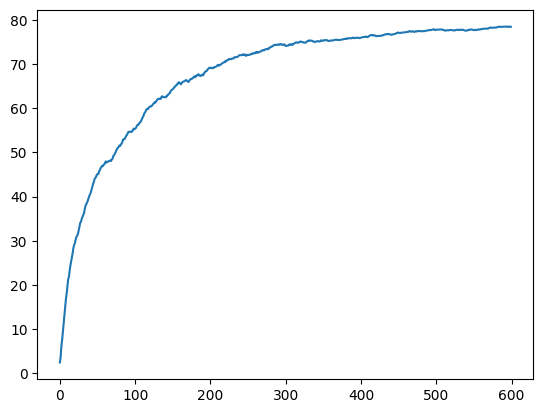

In [301]:
plt.plot(mean_fitnesses)

In [302]:
FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)

[[ 0.70710678  0.70710678  0.70710678  0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339  0.33333333  0.31622777
   0.30151134  0.28867513  0.2773501 ]
 [ 1.          1.          1.          0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339  0.33333333  0.31622777
   0.30151134  0.28867513  0.2773501 ]
 [ 1.          0.          1.          0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339  0.33333333  0.31622777
   0.30151134  0.28867513  0.        ]
 [ 1.          1.          1.          0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339  0.33333333  0.
   0.30151134  0.28867513  0.2773501 ]
 [ 0.70710678  0.70710678  0.70710678  0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339  0.33333333  0.
   0.30151134  0.          0.2773501 ]
 [ 0.57735027  0.57735027  0.57735027  0.57735027  0.57735027  0.5
   0.4472136   0.40824829  0.37796447  0.35355339

goal


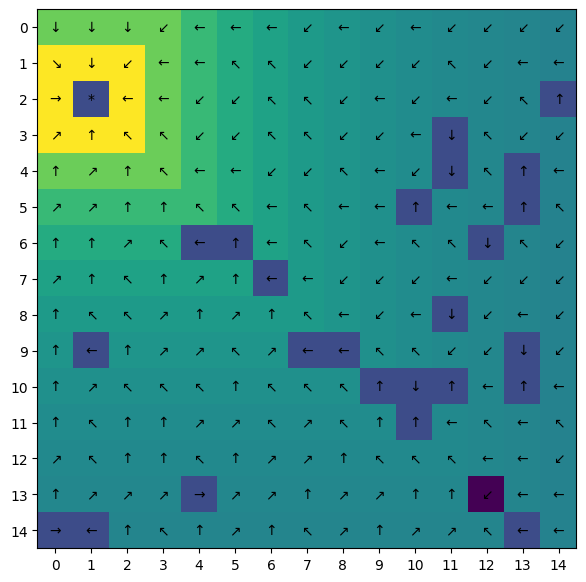

In [303]:
arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)


#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

for i in range(15):
    for j in range(15):
        if (i, j) == goal_position:
            print("goal")
            ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
        else:
            ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')

## Complete the Room Task

In [304]:
## Apply the rule to the env (env.step) until the goal is reached
print("Initial distance from goal:", distance_grid[agent_position])
print("Goal position:", goal_position)
visited_position=np.zeros(shape=(15,15), dtype=int)
total_step=0

env.render()

while agent_position != goal_position:
    
    print("Agent position:", agent_position)
    
    x, y = agent_position
    
    if visited_position[x][y]==1:
        movement=np.random.randint(0,7)
        while not good_movement((x,y), movement):
            movement = np.random.randint(0, 7)  # mutation
        env.step(movement)
    else:
        movement = best_rule.get_movement(x, y)
        env.step(movement)

    agent_position = (agent_position[0] + int_to_coord[movement][0], 
                        agent_position[1] + int_to_coord[movement][1])
   
    visited_position[x][y]=1
    total_step+=1

    if agent_position == goal_position:
        print("Goal reached!")
        break

    env.render()

print(total_step)

Initial distance from goal: 11
Goal position: (2, 1)

You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                .>.............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............        